# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data

table = soup.find("table", {"class" : "data-row"})
table_df = pd.DataFrame(table)
table_df.head()

""


In [6]:
table = soup.find('table')
rows = table.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list

mars_data = []

# Loop through the scraped data to create a list of rows

for row in rows:
    cols = row.find_all('td')
    cols = [element.text.strip() for element in cols]
    mars_data.append([element for element in cols if element])

mars_data

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


colum_names = ['id', 'terrestrial_date','sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(mars_data, columns = colum_names)

In [32]:
# Confirm DataFrame was created successfully

mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


In [33]:
## Dropping the first row where the values are None

mars_df = mars_df.drop(0)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [34]:
# Examine data type of each column

mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [35]:
##From looking at data types, the terrestial_date needs to be converted to datetime and the columns with numbers should be converted to int or float

In [61]:
# Change data types for data analysis

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df[['sol', 'ls', 'month']] = mars_df[['sol', 'ls', 'month']].astype('int') 
mars_df[['min_temp', 'pressure']] = mars_df[["min_temp", 'pressure']].astype('float')


In [62]:
# Confirm type changes were successful by examining data types again

mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.4+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [63]:
# 1. How many months are there on Mars?

##Since our dataframe already has a month column we just need to find the unique number of months

mars_df['month'].nunique()

12

In [64]:
# 2. How many sols (Martian days) worth of data are there?

##Same as above but with the sols column and we are counting the overall number of Martian days with data

mars_df['sol'].count()

1867

In [65]:
# 3. What is the average minimum temperature by month?

##I need to group by month and get the average of the min temp column by month

avg_min_temp = mars_df.groupby('month').min_temp.mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

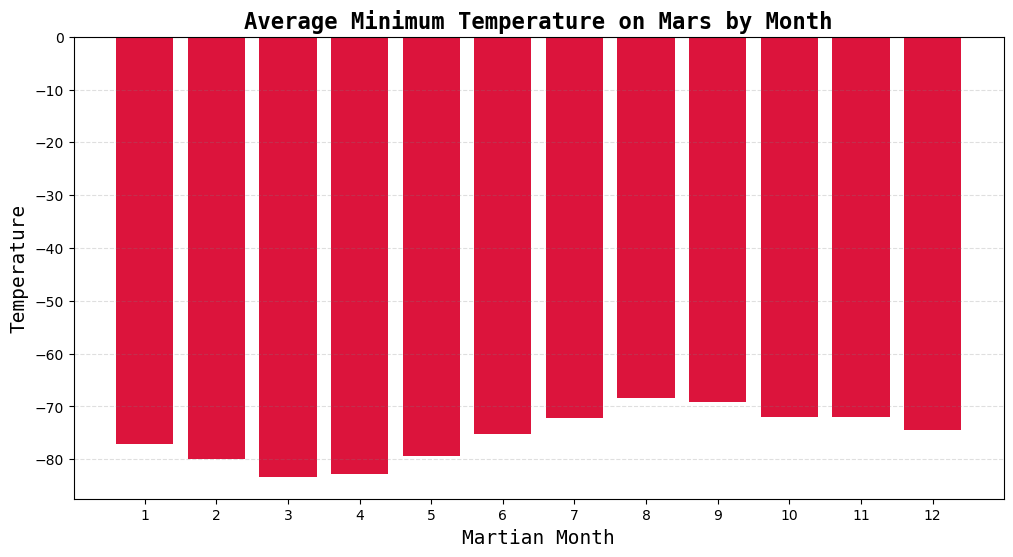

In [83]:
# Plot the average minimum temperature by month

data = avg_min_temp

plt.figure(figsize=(12,6))

plt.bar(data.index, data.values, color="crimson", align="center")

plt.xlabel("Martian Month", fontfamily="Monospace", fontsize=14)
plt.ylabel("Temperature", fontfamily="Monospace", fontsize=14)
plt.title("Average Minimum Temperature on Mars by Month", fontweight="bold", fontsize=16, fontfamily="Monospace")
plt.xticks(data.index)
plt.grid(axis="y", linestyle="--", color="grey", alpha=0.25)

plt.show()

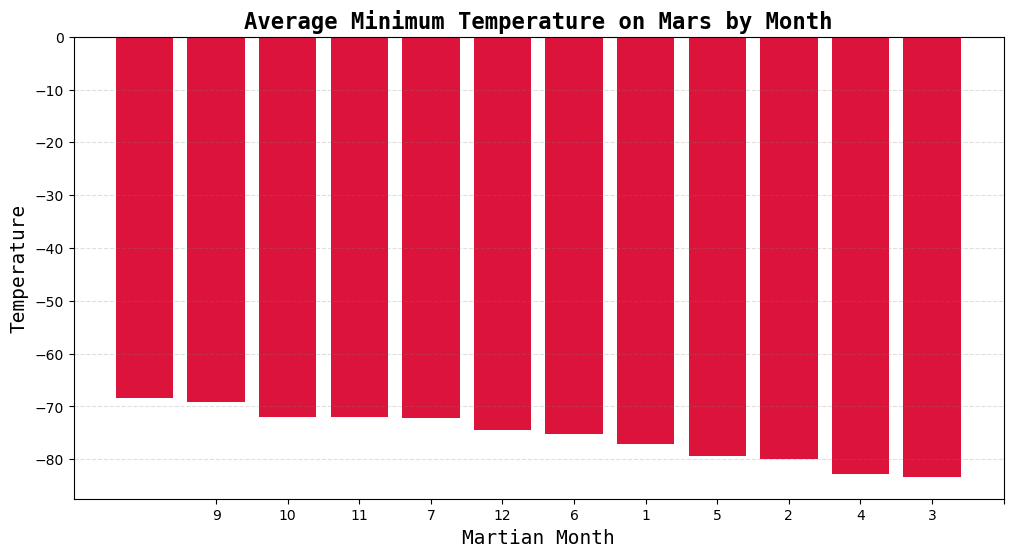

In [105]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph


data = avg_min_temp.sort_values(ascending=False)

plt.figure(figsize=(12,6))

##If the index/month column is still integers the graph will continue to sort them in consecutive order. If I change it to a string it will be ordered by the sorted values instead
plt.bar(data.index.astype(str), data.values, color="crimson", align="center")

plt.xlabel("Martian Month", fontfamily="Monospace", fontsize=14)
plt.ylabel("Temperature", fontfamily="Monospace", fontsize=14)
plt.title("Average Minimum Temperature on Mars by Month", fontweight="bold", fontsize=16, fontfamily="Monospace")
plt.xticks(data.index)
plt.grid(axis="y", linestyle="--", color="grey", alpha=0.25)

plt.show()

In [85]:
# 4. What is the average pressure by month?

avg_pressure = mars_df.groupby('month').pressure.mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

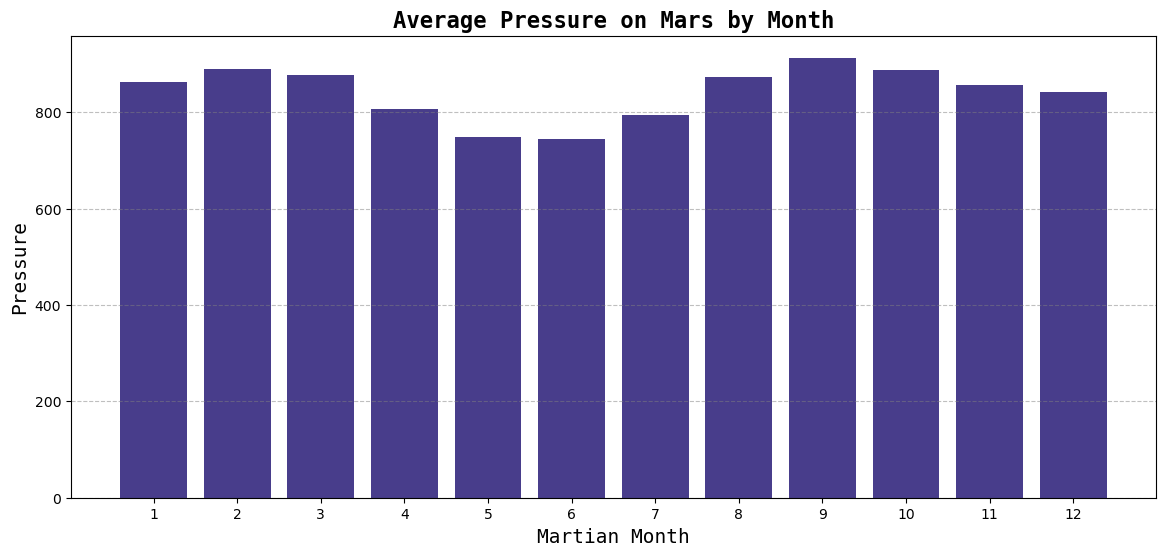

In [93]:
# Plot the average pressure by month

data = avg_pressure

plt.figure(figsize=(14,6))

plt.bar(data.index, data.values, color="darkslateblue", align="center")

plt.xlabel("Martian Month", fontfamily="Monospace", fontsize=14)
plt.ylabel("Pressure", fontfamily="Monospace", fontsize=14)
plt.title("Average Pressure on Mars by Month", fontweight="bold", fontsize=16, fontfamily="Monospace")
plt.xticks(data.index)
plt.grid(axis="y", linestyle="--", color="grey", alpha=0.5)

plt.show()

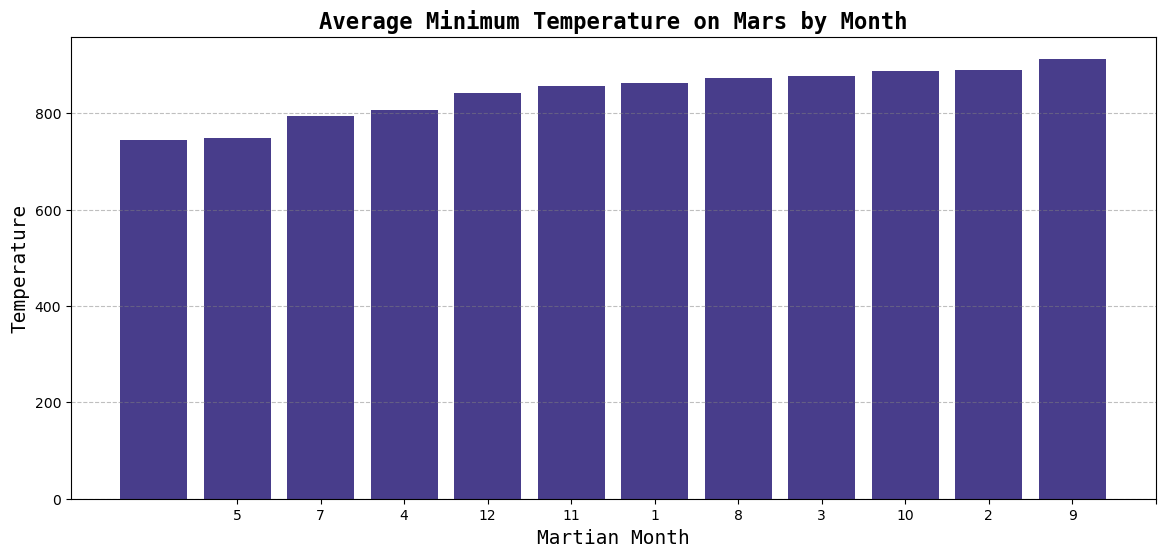

In [97]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

data = avg_pressure.sort_values()

plt.figure(figsize=(14,6))

##Same as min temp graph
plt.bar(data.index.astype(str), data.values, color="darkslateblue", align="center")

plt.xlabel("Martian Month", fontfamily="Monospace", fontsize=14)
plt.ylabel("Temperature", fontfamily="Monospace", fontsize=14)
plt.title("Average Minimum Temperature on Mars by Month", fontweight="bold", fontsize=16, fontfamily="Monospace")
plt.xticks(data.index)
plt.grid(axis="y", linestyle="--", color="grey", alpha=0.5)

plt.show()

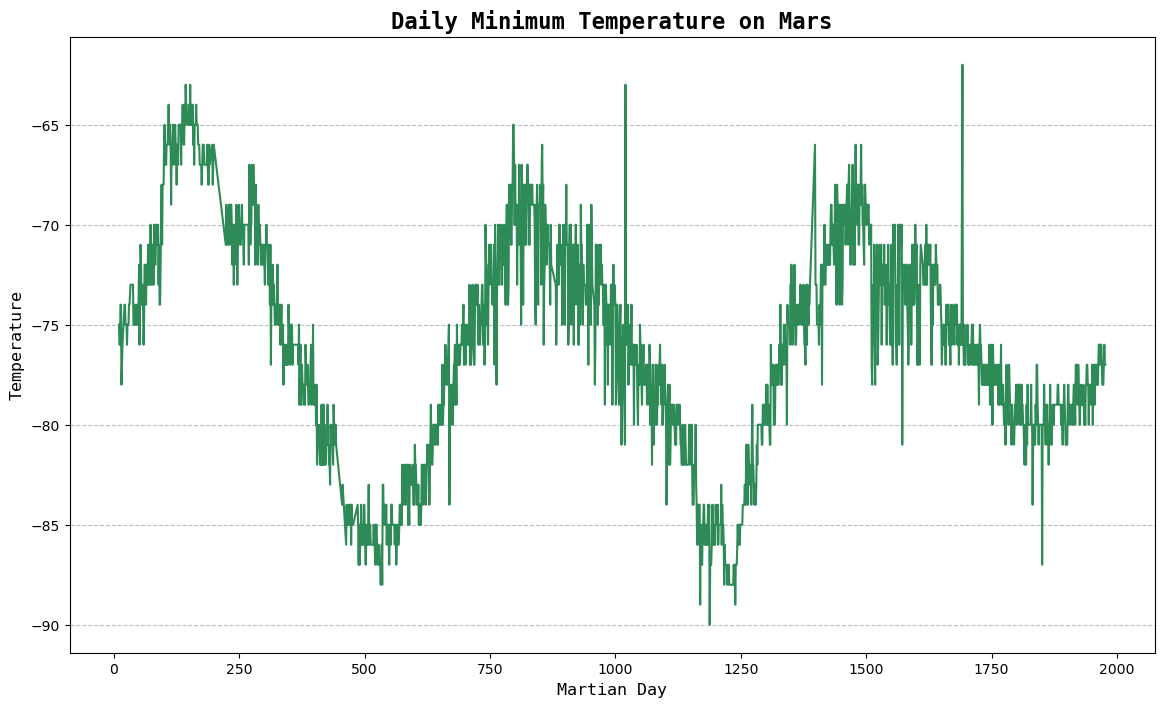

In [106]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

##This should be acheivable with a simple plot of days on the x-axis and min temp on the y-axis

plt.figure(figsize=(14,8))

plt.plot(mars_df.sol, mars_df.min_temp, color = 'seagreen')

plt.title("Daily Minimum Temperature on Mars", fontweight="bold", fontsize=16, fontfamily="Monospace")
plt.xlabel("Martian Day", fontfamily="Monospace", fontsize=12)
plt.ylabel("Temperature", fontfamily="Monospace", fontsize=12)

plt.grid(axis="y", linestyle="--", color="grey", alpha=0.5)

plt.show()

### Minimum Temperature

Month 3 has the lowest average minimum temperatue.

Month 8 has the highest average minimum temperature. 

The bar graph shows negative temperatures, so the longest bars correlate to more negative temperatures, meaning colder.

#### Atmospheric Pressure

Month 6 has the lowest atmospheric pressure.

Month 9 has the highest atmospheric perssure.

#### Year Length

The temperature on Earth cycles at a predictable pattern within a year. Knowing this, we can find two major peaks or troughs on our Mars Daily Temperature plot and take the difference. This would help us estimate how many Martian days passed within that cycle of temp peaks or drops. There are two major troughs around 545 Martian days and 1240 Martian days. 

By taking the difference we get an estimate of 695 Martian days in an Earth year.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [107]:
# Write the data to a CSV

mars_df.to_csv('Mars DataFrame.csv', index=False)

In [108]:
browser.quit()